# 01. Import Libraries

In [1]:
# Step 1 - Create a new notebook, import the necessary analysis and visualization libraries, then import your most up-to-date 
# project data

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Import Dataframe

In [2]:
# Create a string path

path = r'C:\Users\rasmu\Documents\CareerFoundry\A4 Instacart Basket Analysis\02 Data'

In [3]:
df_opc = pd.read_pickle(os.path.join(path, 'Prepd Data', 'opc.pkl'))

# 03. Creating Bar Chart

<AxesSubplot:>

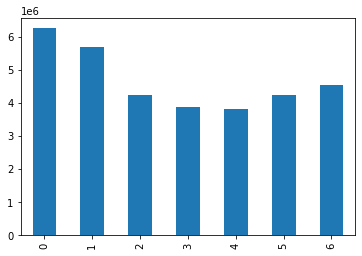

In [4]:
# Step 2 - If you haven’t done so already, follow the instructions in the Exercise to create a bar chart, a histogram, a 
# scatterplot, and a line chart, using a sample subset for the line chart.

# Creating the Bar Chart, sorted by index

df_opc['orders_day_of_week'].value_counts().sort_index().plot.bar()

# 04. Creating Historgram & Scatterplot

In [5]:
# Attempted to create a historgram and was told that the max was set to infinity, thus an error. It wasn't that way prior to 
# the last merge.

# Data consistency check on Prices

df_opc['prices'].describe()

count    3.240486e+07
mean     9.740085e+00
std      4.956429e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [6]:
# Checking for outliers over $100 cost (jumped to this because of the infinity answer)

df_opc.loc[df_opc['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,order_frequency,frequency_flag,Gender,State,Age,date_joined,Dependants,Marital_status,income,_merge
1592,912404,17,12,2,14,5.0,False,21553.0,5.0,0.0,...,5.0,Frequent customer,Female,Kansas,39,9/16/2018,3,married,150659,both
1654,603376,17,22,6,16,4.0,False,21553.0,3.0,1.0,...,5.0,Frequent customer,Female,Kansas,39,9/16/2018,3,married,150659,both
16668,3264360,135,2,2,21,13.0,False,21553.0,6.0,0.0,...,12.0,Regular customer,Female,Maryland,30,3/19/2017,3,married,120635,both
16674,892534,135,3,0,8,12.0,False,21553.0,3.0,1.0,...,12.0,Regular customer,Female,Maryland,30,3/19/2017,3,married,120635,both
54053,229704,342,8,1,19,30.0,False,21553.0,9.0,0.0,...,23.0,Non-frequent customer,Female,Minnesota,56,8/23/2018,2,married,187328,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556283,3172853,205650,18,1,9,7.0,False,21553.0,17.0,1.0,...,6.0,Frequent customer,Male,Kentucky,62,10/2/2017,0,divorced/widowed,302526,both
32583684,2504315,205818,3,5,15,3.0,False,21553.0,13.0,0.0,...,12.0,Regular customer,Male,Maryland,60,7/12/2019,1,married,172539,both
32583694,1108388,205818,5,4,5,1.0,False,21553.0,5.0,1.0,...,12.0,Regular customer,Male,Maryland,60,7/12/2019,1,married,172539,both
32616755,1916142,206049,1,2,17,NaN,True,21553.0,2.0,0.0,...,7.0,Frequent customer,Female,District of Columbia,23,4/26/2019,1,married,169022,both


In [7]:
# Turning these values into NaN because there's most likely an error with them.

df_opc.loc[df_opc['prices'] >100, 'prices'] = np.nan

In [8]:
# Did NaN work?

df_opc['prices'].max()

25.0

In [10]:
#Adjusting the datatype of prices after adjusting the NaNs 

df_opc['prices'] = df_opc['prices'].astype('float16')

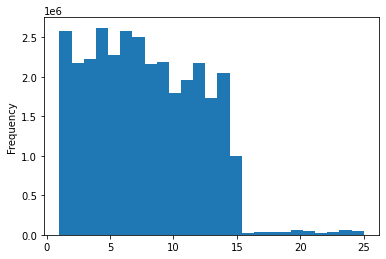

In [11]:
# Retrying the histogram

hist = df_opc['prices'].plot.hist(bins = 25)

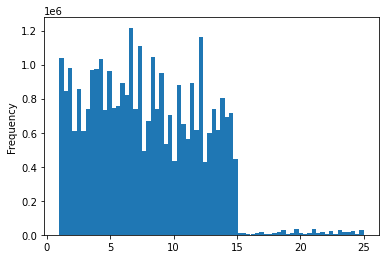

In [12]:
# Increasing the granularity

hist_2 = df_opc['prices'].plot.hist(bins = 70)

<AxesSubplot:xlabel='prices', ylabel='prices'>

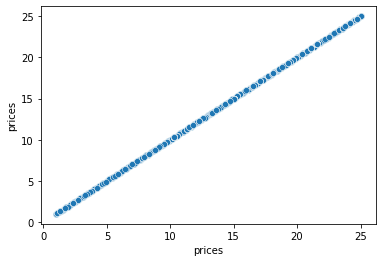

In [14]:
# Creating a scatterplot

sns.scatterplot(x = 'prices', y = 'prices',data = df_opc)

# 05. Creating Line Chart & Sampling Data

In [15]:
# Creating a 70/30 data sample

np.random.seed(4)
dev = np.random.rand(len(df_opc)) <= 0.7

In [16]:
dev

array([False,  True, False, ...,  True, False,  True])

In [17]:
# Create a list holding True/False values to the test np.random.rand() <= 0.7 

np.random.seed(4)
dev = np.random.rand(len(df_opc)) <= 0.7

In [18]:
# Store 70% of the sample in the dataframe big

big = df_opc[dev]

In [19]:
# Store 30% of the sample in the dataframe small

small = df_opc[~dev]

In [20]:
# Checking that results of sampling worked by comparing len() totals

len(df_opc)

32641268

In [21]:
len(big) + len(small)

32641268

In [22]:
# Creating a sample of only the columns we need for the example

df_2 = small[['orders_day_of_week','prices']]

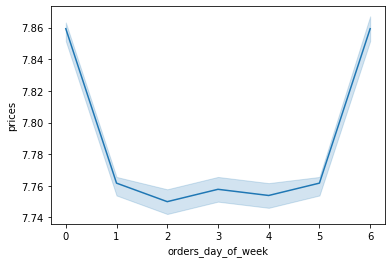

In [23]:
# CREATING THE LINE CHART

line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [24]:
# Comparing the 30% to the 70%

df_4 = big[['orders_day_of_week', 'prices']]

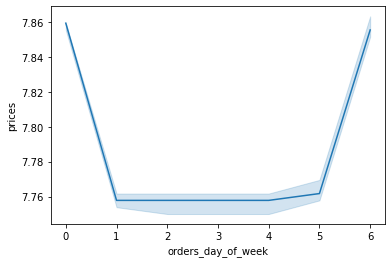

In [25]:
line_2 = sns.lineplot(data = df_4, x = 'orders_day_of_week', y = 'prices')

# 06. TASK PART 2, #3-8

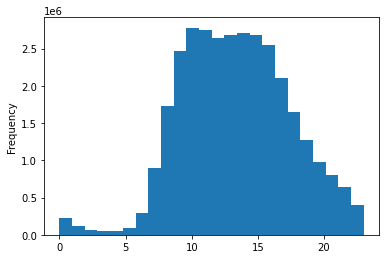

In [26]:
# Part 3 - You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of 
#          the “order_hour_of_day” column.
#             In a markdown cell beneath your histogram, describe what the histogram demonstrates.

hist_3 = df_opc['order_hour_of_day'].plot.hist(bins = 24)

This histogram shows us that the greatest amount of orders takes place over the 10:00am hour (0 = 12:00am hour), followed closely by 11:00am. It also tells us that the highest volume of orders takes place between the 10:00am and 3:00pm hours (10-15), while the lowest hour blocks are from 1:00am to 5:00am.

<AxesSubplot:>

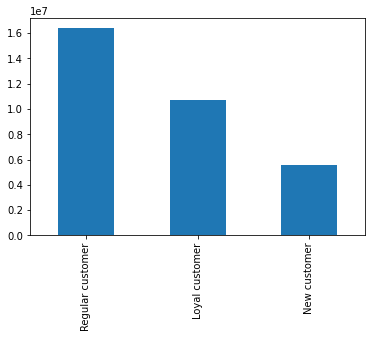

In [27]:
# Part 4 - The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar 
#          chart from the “loyalty_flag” column.

df_opc['loyalty_flag'].value_counts().plot.bar()

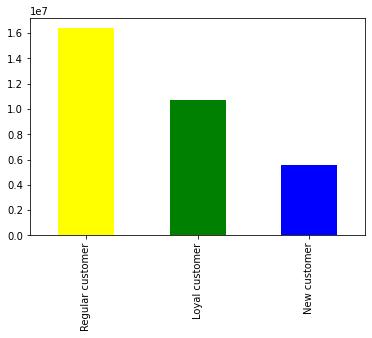

In [28]:
# Adding color

bar = df_opc['loyalty_flag'].value_counts().plot.bar(color = ['yellow', 'green', 'blue'])

In [29]:
# Part 5 - Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. 
#          (Hint: To check this, you need to use an accurate sample for your line chart!)

# Creating a sample for the columns we need

df_3 = small[['order_hour_of_day','prices']]

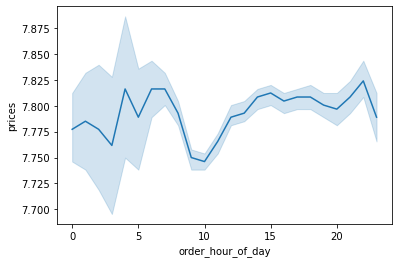

In [30]:
# Creating a line chart for prices/hr of the day

line_3 = sns.lineplot(data = df_3, x = 'order_hour_of_day',y = 'prices')

In [31]:
# Checking against the 70% sample

df_5 = big[['order_hour_of_day', 'prices']]

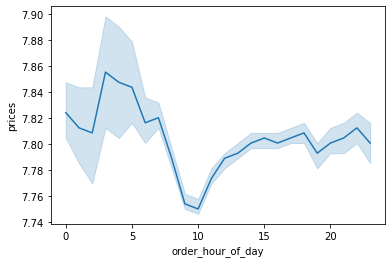

In [32]:
line_4 = sns.lineplot(data = df_5, x = 'order_hour_of_day',y = 'prices')

In [33]:
# Step 6 - Now that you have information about customers, you need to conduct some exploratory analysis of customer 
# demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family
# status by creating a line chart exploring the connections between age and number of dependents:
#          In a markdown cell beneath your line chart, describe what the line chart shows.

#Creating the sample

df_6 = small[['Age', 'Dependants']]

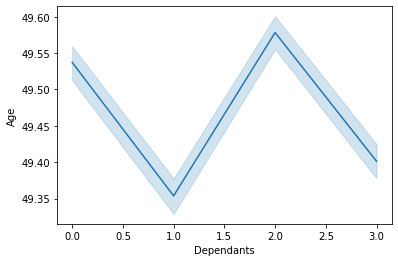

In [34]:
line_5 = sns.lineplot(data = df_6, x = 'Dependants', y = 'Age')

In [35]:
# Checking against larger sample

df_7 = big[['Age', 'Dependants']]

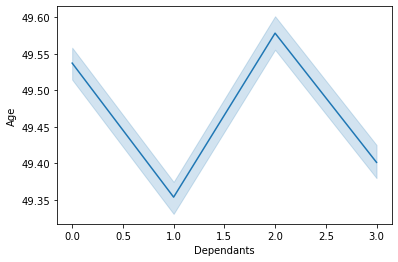

In [36]:
line_6 = sns.lineplot(data = df_6, x = 'Dependants', y = 'Age')

The line charts above show that the average age for Instacart users is around 49.5 and they have an average of 1.5 dependants.

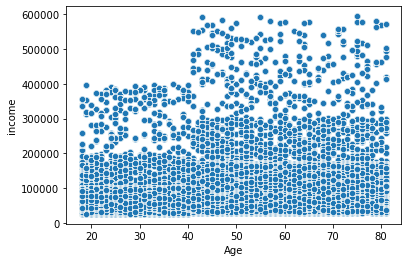

In [37]:
# Step 7 - You’ll also need to explore whether there’s a connection between age and spending power. To visualize this 
#          relationship, create a scatterplot using the sns.scatterplot() function.
#               In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

# Creating a scatterplot for Age/Income

scatter = sns.scatterplot(data = df_opc, x = 'Age', y = 'income')

The scatterplot shows a slightly positive correlation between spending power (income) and age. The higher the spending power (income), the more likely they are older than the average customer. Customers under 40 years of age rarely don't have an income over $40,000 annually.

# 07. Exporting Charts

In [38]:
# Step 8 - Export your visualizations as “.png” files in your relevant project folder.

# new path needed

path = r'C:\Users\rasmu\Documents\CareerFoundry\A4 Instacart Basket Analysis'

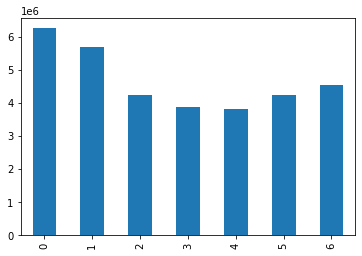

In [39]:
# Didn't previously create a bar object

bar_1 = df_opc['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [40]:
# Exporting Orders by Day of Week Bar Chart

bar_1.figure.savefig(os.path.join(path, '04 Analysis','Viz', 'bar_orders_dow.png'))

In [41]:
# Exporting Histogram of Prices

hist.figure.savefig(os.path.join(path, '04 Analysis','Viz', 'hist_prices.png'))

In [42]:
# Exporting Higher Granularity Historogram of Prices

hist_2.figure.savefig(os.path.join(path, '04 Analysis','Viz', 'hist_2_prices.png'))

In [43]:
# Exporting Line Chart of Small Sample of Prices by Day of Week

line.figure.savefig(os.path.join(path, '04 Analysis','Viz', 'small_prices_dow_line.png'))

In [44]:
# Exporting Line Chart of large Samply of Prices by Day of Week

line_2.figure.savefig(os.path.join(path, '04 Analysis','Viz', 'large_prices_dow_line.png'))

In [45]:
# Exporting Histogram of Sales by Hours of the Day

hist_3.figure.savefig(os.path.join(path, '04 Analysis','Viz', 'hist_sales_hod.png'))

In [46]:
# Exporting Bar Chart of Loyalty Flag

bar.figure.savefig(os.path.join(path, '04 Analysis','Viz', 'bar_loyalty.png'))

In [47]:
# Exporting Line Chart of Small Sample of Prices by Hour of Day

line_3.figure.savefig(os.path.join(path, '04 Analysis','Viz', 'line_small_prices_hod.png'))

In [48]:
# Exporting Line Chart of Large Sample of Prices by Hour of Day

line_4.figure.savefig(os.path.join(path, '04 Analysis','Viz', 'line_large_prices_hod.png'))

In [49]:
# Exporting Line Chart of Small Sample of Age and Family Size of Customers

line_5.figure.savefig(os.path.join(path, '04 Analysis','Viz', 'line_small_age_deps.png'))

In [50]:
# Exporting Line Chart of Large Sample of Age and Family Size of Customers

line_5.figure.savefig(os.path.join(path, '04 Analysis','Viz', 'line_large_age_deps.png'))

In [51]:
# Exporting Scatterplot of Age by Spending Power/Income

scatter.figure.savefig(os.path.join(path, '04 Analysis','Viz', 'scatter_age_income.png'))